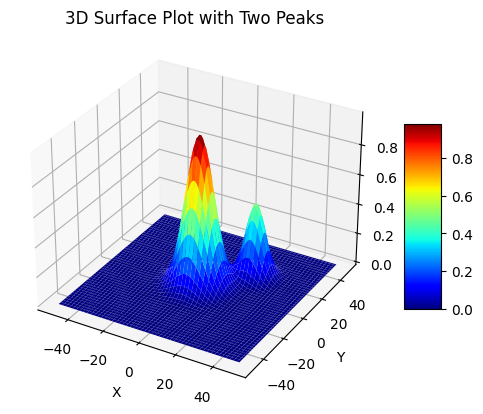

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データの生成
X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(X, Y)

# 二つの異なる関数を重ねる例
Z1 = np.exp(-0.01 * (X**2 + Y**2))
Z2 = 0.5 * np.exp(-0.02 * ((X - 20)**2 + (Y - 20)**2))
Z = Z1 + Z2

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')

# カラーバーを追加
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# ラベルの追加
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# タイトルの追加
ax.set_title('3D Surface Plot with Two Peaks')

plt.show()


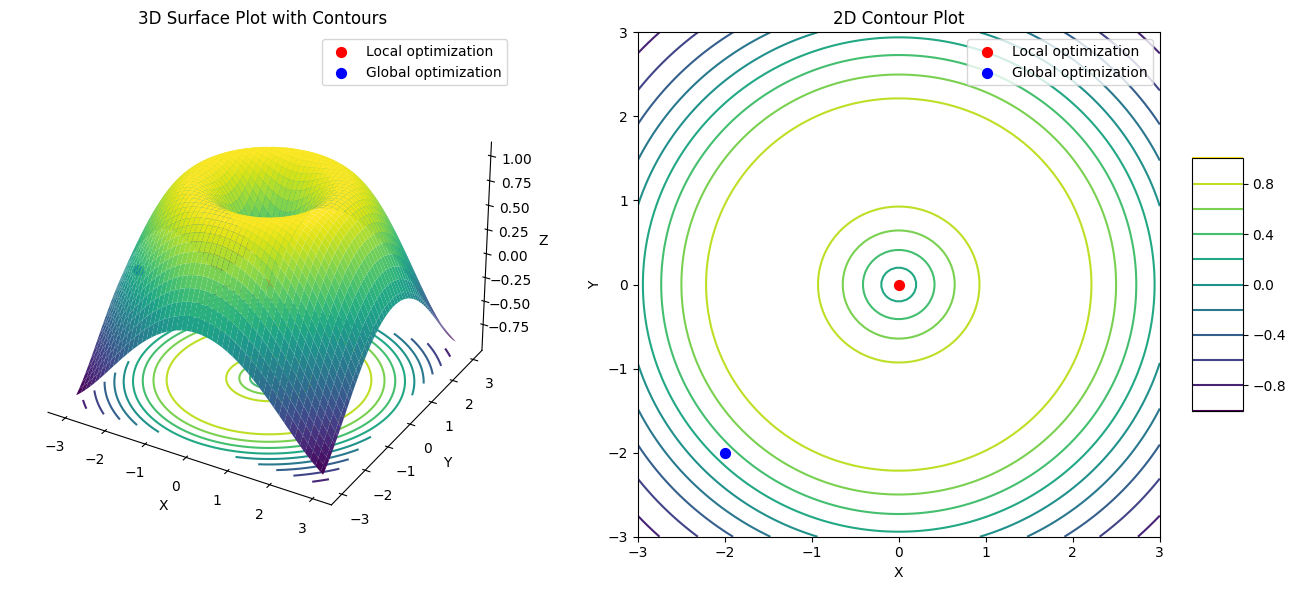

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データの生成
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# プロットの作成
fig = plt.figure(figsize=(14, 6))

# 3Dプロット
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
contour = ax1.contour(X, Y, Z, 10, cmap='viridis', linestyles="solid", offset=-1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Surface Plot with Contours')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.xaxis.pane.set_edgecolor('none')
ax1.yaxis.pane.set_edgecolor('none')
ax1.zaxis.pane.set_edgecolor('none')
ax1.grid(False)  # グリッドを消す
#fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# 2D等高線プロット
ax2 = fig.add_subplot(122)
contour2d = ax2.contour(X, Y, Z, 10, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('2D Contour Plot')
fig.colorbar(contour2d, ax=ax2, shrink=0.5, aspect=5)

# 最適化点のプロット（例）
local_opt = (0, 0, np.sin(0))  # ローカル最適化点（例）
global_opt = (-2, -2, np.sin(np.sqrt(8)))  # グローバル最適化点（例）

ax1.scatter(*local_opt, color='red', s=50, label='Local optimization')
ax1.scatter(*global_opt, color='blue', s=50, label='Global optimization')
ax1.legend()

ax2.scatter(local_opt[0], local_opt[1], color='red', s=50, label='Local optimization')
ax2.scatter(global_opt[0], global_opt[1], color='blue', s=50, label='Global optimization')
ax2.legend()

plt.tight_layout()
plt.show()

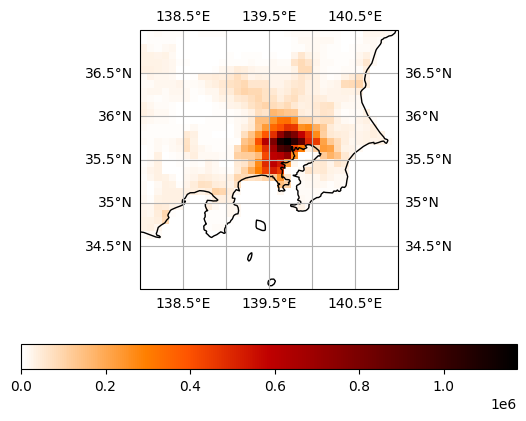

In [259]:
import cartopy.crs as ccrs
import cartopy.feature as cfea

def geography():
    #
    left = 138
    right = 141
    bottom = 34
    top = 37
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography()
ay, bx = 2160, 4320
gl5shape = (ay, bx)
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
pop = np.fromfile(f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5', dtype='float32').reshape(2160, 4320)
ara = np.fromfile(f'{h08dir}/dat/lnd_ara_/lndara.CAMA.gl5', dtype='float32').reshape(2160, 4320)

# crop
pop_cropped = pop[upperindex:lowerindex, leftindex:rightindex]
ara_cropped = ara[upperindex:lowerindex, leftindex:rightindex]
dns_cropped = pop_cropped/(ara_cropped / 10**6)

# extent
projection = ccrs.PlateCarree()

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
#ax.add_feature(cfea.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=2)
ax.add_feature(cfea.LAKES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.gridlines(draw_labels=True)
im = ax.imshow(pop_cropped,
               origin='upper',
               extent=img_extent,
               transform=projection,
               cmap='gist_heat_r')
fig.colorbar(im, ax=ax, orientation='horizontal')

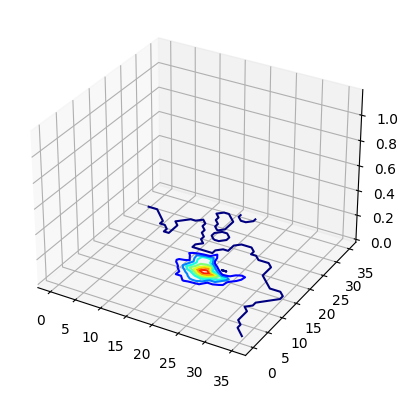

In [49]:
x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = pop_cropped

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
contour = ax.contour(X, Y, Z, 10, cmap='jet', linestyles="solid", offset=-1)
plt.show()

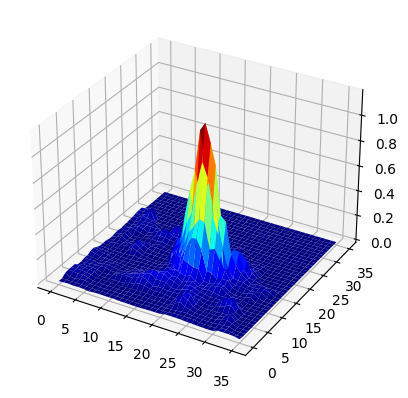

In [211]:
x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
x, y = np.meshgrid(x, y)
z = pop_cropped

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
surf = ax.plot_surface(x, y, z, cmap='jet', edgecolor='none')
plt.show()

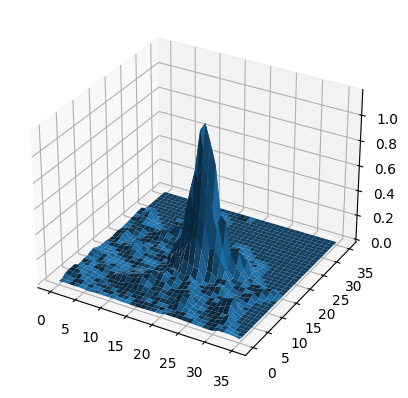

In [212]:
def plot_surface_with_y_inversion(ax, X, Y, Z, invert_y=False, **kwargs):
    if invert_y:
        Y = Y[::-1]
        Z = Z[::-1, :]
    return ax.plot_surface(X, Y, Z, **kwargs)

x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
x, y = np.meshgrid(x, y)
z = pop_cropped

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
surf = plot_surface_with_y_inversion(ax, x, y, z, invert_y=True)
plt.show()

/tmp/ipykernel_391/492706319.py:5: RuntimeWarning: divide by zero encountered in log
  Z_log = np.log(Z)/np.log(10)


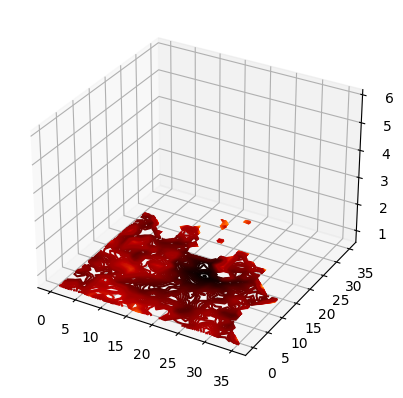

In [75]:
x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = pop_cropped
Z_log = np.log(Z)/np.log(10)

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
contour = ax.contour(X, Y, Z_log, 100, cmap='gist_heat_r', offset=0.5)
plt.show()

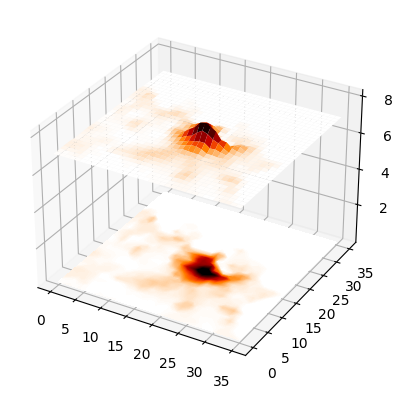

In [178]:
x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
pop_masked = np.ma.masked_where(pop_cropped < 0, pop_cropped)
Z = pop_masked
Z_dash = Z + 7e6

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
surface = ax.plot_surface(X, Y, Z_dash, cmap='gist_heat_r')
contour = ax.contourf(X, Y, Z, 1000, cmap='gist_heat_r', vmin=0, vmax=1e6, offset=0)
plt.show()

/tmp/ipykernel_391/172329765.py:5: RuntimeWarning: divide by zero encountered in log
  Z_log = np.log(Z)/np.log(2)
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1171: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1172: RuntimeWarning: invalid value encountered in subtract
  v2 = polygons[..., i2, :] - polygons[..., i3, :]
/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:1647: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:1650: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)


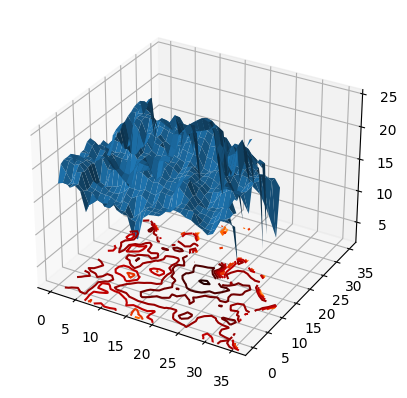

In [260]:
x = np.arange(pop_cropped.shape[1])
y = np.arange(pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = pop_cropped
Z_log = np.log(Z)/np.log(2)
Z_dash = Z_log  + 5

# プロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
surf = ax.plot_surface(X, Y, Z_dash, edgecolor='none')
contour = ax.contour(X, Y, Z_log, 10, cmap='gist_heat_r', offset=0.5)
plt.show()

In [ ]:

"""
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
ax.grid(False)
#
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#
# 軸のラベル
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('Z')

# Z軸の目盛を指数表記に設定
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z軸の線を透明にする
ax.set_zticks([])  # Z軸の目盛りを消す
ax.set_zticklabels([])  # Z軸のラベルを消す
"""

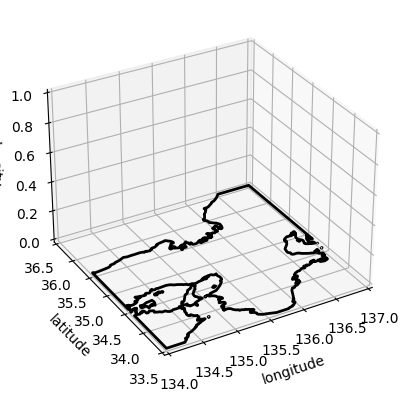

In [316]:
import itertools
import pandas as pd
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cartopy.mpl.patch import geos_to_path
from matplotlib.collections import PolyCollection

# メインのプロット
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
# 領域の指定
ax3d.set_xlim(134.0,137.0)
ax3d.set_ylim(33.5,36.5)
ax3d.set_zlim(0,1)
# ラベル
ax3d.set_xlabel("longitude")
ax3d.set_ylabel("latitude")
ax3d.set_zlabel("density")

# 地図のためのaxisを設定
proj_ax = plt.figure().add_subplot(111, projection=ccrs.PlateCarree())
proj_ax.set_xlim(ax3d.get_xlim())
proj_ax.set_ylim(ax3d.get_ylim())
# geometryの取得
target_projection = proj_ax.projection
feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
geoms = feature.geometries()
# 領域取得
boundary = proj_ax._get_extent_geom()
# 投影方法の変換
geoms = [target_projection.project_geometry(geom, feature.crs) for geom in geoms]

# invalid な geometryの排除
geoms2 = []
for i in range(len(geoms)) :
    if geoms[i].is_valid :
        geoms2.append(geoms[i])

geoms = geoms2

# intersection
geoms = [boundary.intersection(geom) for geom in geoms]
# geometry to path to polygon to collection
concat = lambda iterable: list(itertools.chain.from_iterable(iterable))
paths = concat(geos_to_path(geom) for geom in geoms)
polys = concat(path.to_polygons() for path in paths)
lc = PolyCollection(polys, edgecolor='black', linewidth=2, facecolor=(0,0,0,0), closed=True)

# 挿入
ax3d.add_collection3d(lc, zs=0)
ax3d.view_init(elev=30, azim=-120)
plt.close(proj_ax.figure) # 閉じないと plt.showで2個出てくる
plt.show() 

In [252]:
# main

In [317]:
def c3d(left, right, bottom, top):
    fig = plt.figure()
    ax3d = fig.add_subplot(111, projection='3d')
    ax3d.set_xlim(left, right)
    ax3d.set_ylim(bottom, top)
    proj_ax = plt.figure().add_subplot(111, projection=ccrs.PlateCarree())
    proj_ax.set_xlim(ax3d.get_xlim())
    proj_ax.set_ylim(ax3d.get_ylim())
    target_projection = proj_ax.projection
    feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
    geoms = feature.geometries()
    boundary = proj_ax._get_extent_geom()
    geoms = [target_projection.project_geometry(geom, feature.crs) for geom in geoms]
    geoms2 = []
    for i in range(len(geoms)) :
        if geoms[i].is_valid :
            geoms2.append(geoms[i])
    geoms = geoms2
    geoms = [boundary.intersection(geom) for geom in geoms]
    concat = lambda iterable: list(itertools.chain.from_iterable(iterable))
    paths = concat(geos_to_path(geom) for geom in geoms)
    polys = concat(path.to_polygons() for path in paths)
    lc = PolyCollection(polys, edgecolor='black', linewidth=1.5, facecolor=(0,0,0,0), closed=True)
    plt.close(proj_ax.figure) # 閉じないと plt.showで2個出てくる
    plt.close(fig.figure) # 閉じないと plt.showで2個出てくる
    return lc

In [318]:
import cartopy.crs as ccrs
import cartopy.feature as cfea

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

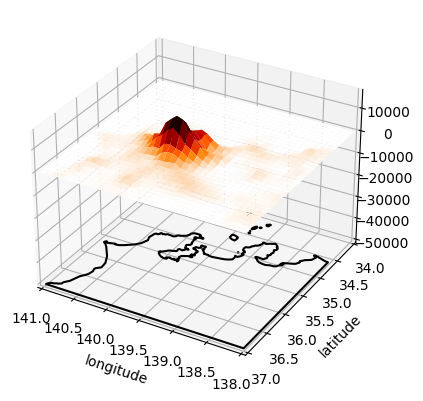

In [319]:
left = 138
right = 141
bottom = 34
top = 37
#
map_depth = -5e4
#
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
#
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
pop = np.fromfile(f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5', dtype='float32').reshape(2160, 4320)
ara = np.fromfile(f'{h08dir}/dat/lnd_ara_/lndara.CAMA.gl5', dtype='float32').reshape(2160, 4320)
#
pop_cropped = pop[upperindex:lowerindex, leftindex:rightindex]
ara_cropped = ara[upperindex:lowerindex, leftindex:rightindex]
dns_cropped = pop_cropped/(ara_cropped / 10**6)
#
x = np.linspace(left, right, pop_cropped.shape[1])
y = np.linspace(bottom, top, pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = np.ma.masked_where(dns_cropped < 0, dns_cropped)

# プロットの作成
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
# 領域の指定
ax3d.set_xlim(left, right)
ax3d.set_ylim(bottom,top)
ax3d.set_zlim(map_depth, np.max(Z))
# ラベル
ax3d.set_xlabel("longitude")
ax3d.set_ylabel("latitude")
#
surface = ax3d.plot_surface(X[::-1], Y[::-1], Z, cmap='gist_heat_r')
#
lc = c3d(right, left, bottom, top)
ax3d.add_collection3d(lc, zs=map_depth, zdir='z')
ax3d.view_init(elev=30, azim=120)
#
plt.show() 

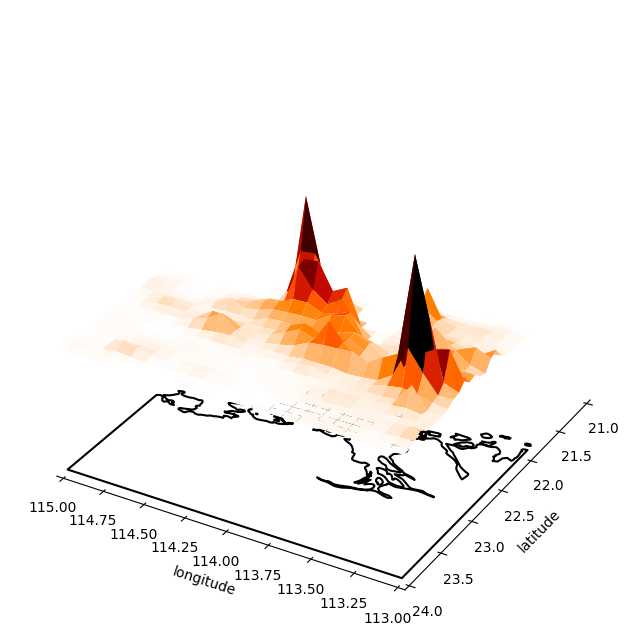

In [320]:
left = 113
right = 115
bottom = 21
top = 24
#
map_depth = -3e4
figsize=(8,10)
#
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
#
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
pop = np.fromfile(f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5', dtype='float32').reshape(2160, 4320)
ara = np.fromfile(f'{h08dir}/dat/lnd_ara_/lndara.CAMA.gl5', dtype='float32').reshape(2160, 4320)
#
pop_cropped = pop[upperindex:lowerindex, leftindex:rightindex]
ara_cropped = ara[upperindex:lowerindex, leftindex:rightindex]
dns_cropped = pop_cropped/(ara_cropped / 10**6)
#
x = np.linspace(left, right, pop_cropped.shape[1])
y = np.linspace(bottom, top, pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = np.ma.masked_where(dns_cropped < 0, dns_cropped)

# プロットの作成
fig = plt.figure(figsize=figsize)
#
ax3d = fig.add_subplot(111, projection='3d')
# 領域の指定
ax3d.set_xlim(left, right)
ax3d.set_ylim(bottom,top)
ax3d.set_zlim(map_depth, np.max(Z))
# ラベル
ax3d.set_xlabel("longitude")
ax3d.set_ylabel("latitude")
#
surface = ax3d.plot_surface(X[::-1], Y[::-1], Z, cmap='gist_heat_r')
#
lc = c3d(right, left, bottom, top)
ax3d.add_collection3d(lc, zs=map_depth, zdir='z')
ax3d.view_init(elev=30, azim=120)
#
ax3d.xaxis.pane.fill = False
ax3d.yaxis.pane.fill = False
ax3d.zaxis.pane.fill = False
ax3d.xaxis.pane.set_edgecolor('none')
ax3d.yaxis.pane.set_edgecolor('none')
ax3d.zaxis.pane.set_edgecolor('none')
ax3d.grid(False)
#
# Z軸の目盛を指数表記に設定
ax3d.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z軸の線を透明にする
ax3d.set_zticks([])  # Z軸の目盛りを消す
ax3d.set_zticklabels([])  # Z軸のラベルを消す
#
plt.show() 

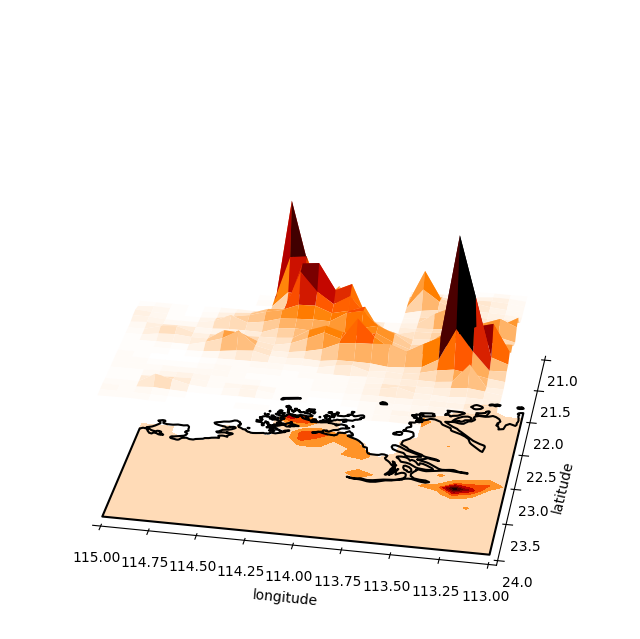

In [328]:
left = 113
right = 115
bottom = 21
top = 24
#
surplus = 3e4
map_depth = 0
figsize=(8,10)
#
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
#
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
lndmsk = np.fromfile(f'{h08dir}/dat/lnd_msk_/lndmsk.CAMA.gl5', dtype='float32').reshape(2160, 4320)
pop = np.fromfile(f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5', dtype='float32').reshape(2160, 4320)
ara = np.fromfile(f'{h08dir}/dat/lnd_ara_/lndara.CAMA.gl5', dtype='float32').reshape(2160, 4320)
#
lndmsk_cropped = lndmsk[upperindex:lowerindex, leftindex:rightindex]
pop_cropped = pop[upperindex:lowerindex, leftindex:rightindex]
ara_cropped = ara[upperindex:lowerindex, leftindex:rightindex]
dns_cropped = pop_cropped/(ara_cropped / 10**6)
#
x = np.linspace(left, right, pop_cropped.shape[1])
y = np.linspace(bottom, top, pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
Z = np.ma.masked_where(dns_cropped < 0, dns_cropped)
Z_dash = Z + surplus

# プロットの作成
fig = plt.figure(figsize=figsize)
#
ax3d = fig.add_subplot(111, projection='3d')
# 領域の指定
ax3d.set_xlim(left, right)
ax3d.set_ylim(bottom,top)
ax3d.set_zlim(map_depth, np.max(Z_dash))
# ラベル
ax3d.set_xlabel("longitude")
ax3d.set_ylabel("latitude")
#
surface = ax3d.plot_surface(X[::-1], Y[::-1], Z_dash, cmap='gist_heat_r')
#
Z = np.ma.masked_where(lndmsk_cropped < 1, Z)
contour = ax3d.contourf(X[::-1], Y[::-1], Z, zdir='z', offset=map_depth, cmap='gist_heat_r')
#
lc = c3d(right, left, bottom, top)
ax3d.add_collection3d(lc, zs=map_depth, zdir='z')
ax3d.view_init(elev=30, azim=100)
#
ax3d.xaxis.pane.fill = False
ax3d.yaxis.pane.fill = False
ax3d.zaxis.pane.fill = False
ax3d.xaxis.pane.set_edgecolor('none')
ax3d.yaxis.pane.set_edgecolor('none')
ax3d.zaxis.pane.set_edgecolor('none')
ax3d.grid(False)
#
# Z軸の目盛を指数表記に設定
ax3d.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z軸の線を透明にする
ax3d.set_zticks([])  # Z軸の目盛りを消す
ax3d.set_zticklabels([])  # Z軸のラベルを消す
#
plt.show() 

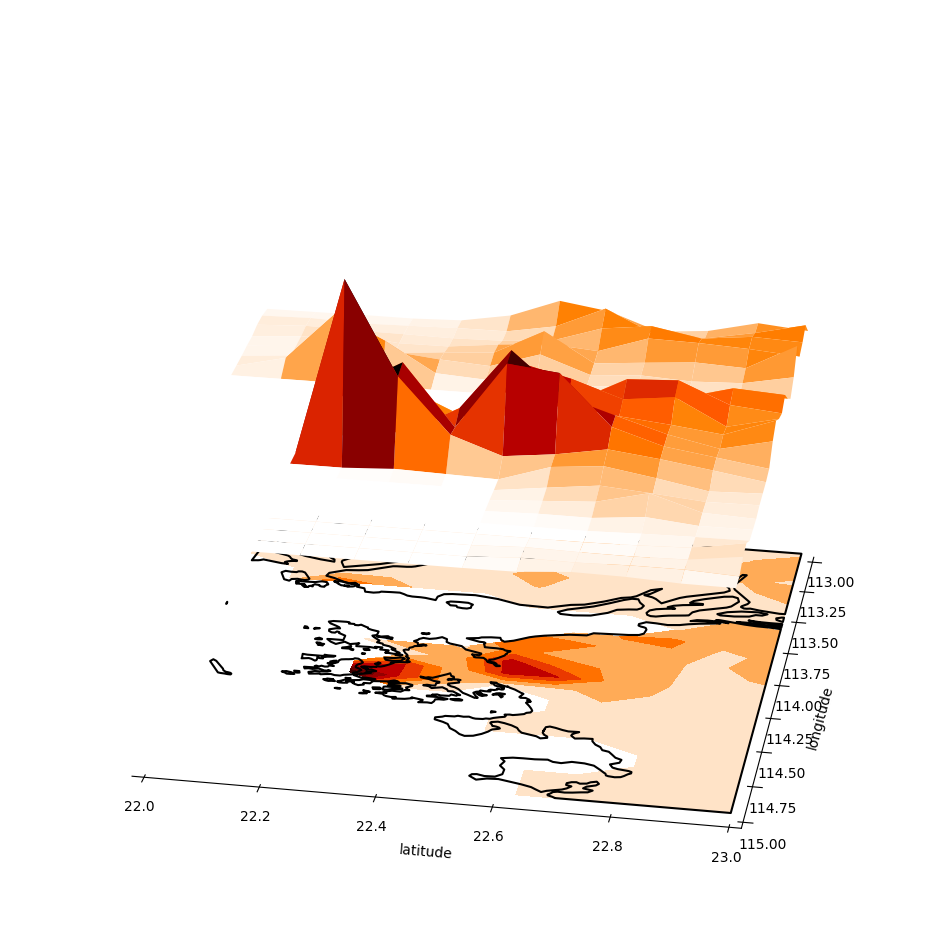

In [350]:
left = 113
right = 115
bottom = 22
top = 23
#
surplus = 3e4
map_depth = 0
figsize=(12, 15)
elev, azim = 25, 10
#
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
#
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
lndmsk = np.fromfile(f'{h08dir}/dat/lnd_msk_/lndmsk.CAMA.gl5', dtype='float32').reshape(2160, 4320)
pop = np.fromfile(f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5', dtype='float32').reshape(2160, 4320)
ara = np.fromfile(f'{h08dir}/dat/lnd_ara_/lndara.CAMA.gl5', dtype='float32').reshape(2160, 4320)
#
lndmsk_cropped = lndmsk[upperindex:lowerindex, leftindex:rightindex]
pop_cropped = pop[upperindex:lowerindex, leftindex:rightindex]
ara_cropped = ara[upperindex:lowerindex, leftindex:rightindex]
dns_cropped = pop_cropped/(ara_cropped / 10**6)
#
x = np.linspace(left, right, pop_cropped.shape[1])
y = np.linspace(bottom, top, pop_cropped.shape[0])
X, Y = np.meshgrid(x, y)
#Z = np.ma.masked_where(dns_cropped < 0, dns_cropped)
Z = dns_cropped
Z_dash = Z + surplus

# プロットの作成
fig = plt.figure(figsize=figsize)
#
ax3d = fig.add_subplot(111, projection='3d')
# 領域の指定
ax3d.set_xlim(left, right)
ax3d.set_ylim(bottom,top)
ax3d.set_zlim(map_depth, np.max(Z_dash))
# ラベル
#ax3d.set_xlabel("longitude")
#ax3d.set_ylabel("latitude")
#
surface = ax3d.plot_surface(X[::-1], Y[::-1], Z_dash, cmap='gist_heat_r')
#
Z = np.ma.masked_where(lndmsk_cropped < 1, Z)
contour = ax3d.contourf(X[::-1], Y[::-1], Z, zdir='z', offset=map_depth, cmap='gist_heat_r')
#
lc = c3d(right, left, bottom, top)
ax3d.add_collection3d(lc, zs=map_depth, zdir='z')
ax3d.view_init(elev=elev, azim=azim)
#
ax3d.xaxis.pane.fill = False
ax3d.yaxis.pane.fill = False
ax3d.zaxis.pane.fill = False
ax3d.xaxis.pane.set_edgecolor('none')
ax3d.yaxis.pane.set_edgecolor('none')
ax3d.zaxis.pane.set_edgecolor('none')
ax3d.grid(False)
#
# Z軸の目盛を指数表記に設定
ax3d.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z軸の線を透明にする
ax3d.set_zticks([])  # Z軸の目盛りを消す
ax3d.set_zticklabels([])  # Z軸のラベルを消す
#
plt.show() 